![](lebron-james.jpg)

# LeBron James: maior pontuador da história da NBA

No dia 8 de fevereiro de 2023, LeBron James se tornou o maior pontuador da história da NBA, ultrapassando Kareem Abdul-Jabbar. Nesse dia, LeBron alcançou 38.390 pontos na carreira, três a mais que Kareem. Kareem foi o dono do pódio por 34 anos, desde que anunciou sua aposentadoria em 1989.

LeBron James já consquistou quatro anéis, dois pelo Miami Heat, um pelo Cleveland Cavaliers e um pelo Los Angeles Lakers. Além disso, LeBron está em quarto lugar na liga no número de assistências.

__Maiores cestinhas da NBA__ (até o dia 8 de fevereiro)
1. LeBron James - 38.390
2. Kareem Abdul-Jabbar - 38.387
3. Karl Malone - 36.928
4. Kobe Bryant - 33.643
5. Michael Jordan - 32.292
6. Wilt Chamberlain - 31.419
7. Dirk Nowitzki - 29.527
8. Shaquille O'Neal - 28.596
9. Carmelo Anthony - 28.289
10. Moses Malone - 27.409

Agora que vimos um resumo da história de LeBron James, vamos ao __objetivo__ principal dessa análise. O intuito aqui é responder duas perguntas:
* Quantos pontos LeBron marcou em cada temporada e qual o valor acumulado temporada após temporada?
* Em relação aos 5 maiores pontuadores, como LeBron se compara no volume total de pontos acumulados em cada temporada?

---

In [23]:
# Bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
from IPython.display import display


from nba_api.stats.static import players
from nba_api.stats.static import teams
from nba_api.stats.endpoints import playercareerstats

pd.set_option('display.max_rows', 250)

## Encontrando os IDs dos jogadores

Para iniciar nossa análise, primeiramente precisamos encontrar os IDs dos jogadores que estão entre os 5 maiores pontuadores da história:
1. LeBron James
2. Kareem Abdul-Jabbar
3. Karl Malone
4. Kobe Bryant
5. Michael Jordan

Com isso, iremos capturar todos os jogadores da liga e transformar em um dataframe.

In [2]:
# Capturando todos os jogadores da NBA
all_players = players.get_players()
players_df = pd.DataFrame(all_players)

In [3]:
players_df.head(10)

,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,False
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,False
3,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,False
4,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,False
5,949,Shareef Abdur-Rahim,Shareef,Abdur-Rahim,False
6,76005,Tom Abernethy,Tom,Abernethy,False
7,76006,Forest Able,Forest,Able,False
8,76007,John Abramovic,John,Abramovic,False
9,203518,Alex Abrines,Alex,Abrines,False


Ao verificar o dataframe `players_df`, podemos perceber que as colunas nos possibilitam encontrar o ID de cada um. Vamos capturar os IDs dos jogadores que estão no Top 5.

In [4]:
top5 = ['LeBron James', 'Kareem Abdul-Jabbar', 'Karl Malone', 'Kobe Bryant', 'Michael Jordan']
top5_dict = {}

for player in top5:
    selected_id = players_df.id[players_df['full_name'] == player].to_list()
    top5_dict[player] = selected_id

top5_dict

{'LeBron James': [2544],
 'Kareem Abdul-Jabbar': [76003],
 'Karl Malone': [252],
 'Kobe Bryant': [977],
 'Michael Jordan': [893]}

In [5]:
top5_df = pd.DataFrame(top5_dict).transpose().reset_index()
top5_df

,index,0
0,LeBron James,2544
1,Kareem Abdul-Jabbar,76003
2,Karl Malone,252
3,Kobe Bryant,977
4,Michael Jordan,893


Como vimos acima, os nomes das colunas ficaram com uma especificação estranha. Abaixo renomeamos para algo mais intuitivo:

In [6]:
top5_df = top5_df.rename(columns={'index': 'player', 0: 'id'})

In [7]:
top5_df

,player,id
0,LeBron James,2544
1,Kareem Abdul-Jabbar,76003
2,Karl Malone,252
3,Kobe Bryant,977
4,Michael Jordan,893


---

## Total de pontos por temporada

Nessa etapa vamos agregar de forma cumulativa o total de pontos por temporada de cada jogador que está no Top 5.

In [8]:
# Capturando as estatísticas de cada jogador
lebron = playercareerstats.PlayerCareerStats(player_id='2544')
kareem = playercareerstats.PlayerCareerStats(player_id='76003')
malone = playercareerstats.PlayerCareerStats(player_id='252')
kobe = playercareerstats.PlayerCareerStats(player_id='977')
mj = playercareerstats.PlayerCareerStats(player_id='893')

In [9]:
# Transformando as estatísticas em um dataframe pra cada jogador
lebron = lebron.get_data_frames()[0]
kareem = kareem.get_data_frames()[0]
malone = malone.get_data_frames()[0]
kobe = kobe.get_data_frames()[0]
mj = mj.get_data_frames()[0]

In [10]:
lebron

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2544,2003-04,00,1610612739,CLE,19.0,79,79,3120.0,622,...,0.754,99,333,432,465,130,58,273,149,1654
1,2544,2004-05,00,1610612739,CLE,20.0,80,80,3388.0,795,...,0.750,111,477,588,577,177,52,262,146,2175
2,2544,2005-06,00,1610612739,CLE,21.0,79,79,3361.0,875,...,0.738,75,481,556,521,123,66,260,181,2478
3,2544,2006-07,00,1610612739,CLE,22.0,78,78,3190.0,772,...,0.698,83,443,526,470,125,55,250,171,2132
4,2544,2007-08,00,1610612739,CLE,23.0,75,74,3027.0,794,...,0.712,133,459,592,539,138,81,255,165,2250
5,2544,2008-09,00,1610612739,CLE,24.0,81,81,3054.0,789,...,0.780,106,507,613,587,137,93,241,139,2304
6,2544,2009-10,00,1610612739,CLE,25.0,76,76,2966.0,768,...,0.767,71,483,554,651,125,77,261,119,2258
7,2544,2010-11,00,1610612748,MIA,26.0,79,79,3063.0,758,...,0.759,80,510,590,554,124,50,284,163,2111
8,2544,2011-12,00,1610612748,MIA,27.0,62,62,2326.0,621,...,0.771,94,398,492,387,115,50,213,96,1683
9,2544,2012-13,00,1610612748,MIA,28.0,76,76,2877.0,765,...,0.753,97,513,610,551,129,67,226,110,2036


Acima podemos ver que conseguimos ter o total de pontos em cada temporada. O próximo passo é fazer a soma dos pontos de forma cumulativa, criando assim uma nova coluna com essa informação.

In [11]:
# Criando nova coluna para armazenar os pontos de forma cumulativa
lebron['PTS_SUM'] = np.cumsum(lebron['PTS'])
kareem['PTS_SUM'] = np.cumsum(kareem['PTS'])
malone['PTS_SUM'] = np.cumsum(malone['PTS'])
kobe['PTS_SUM'] = np.cumsum(kobe['PTS'])
mj['PTS_SUM'] = np.cumsum(mj['PTS'])

In [12]:
top5_players = [lebron, kareem, malone, kobe, mj]

for n, p in zip(top5, top5_players):
    print(f"A soma de pontos cumulativa de {n} é: {p['PTS_SUM'].max()}")

A soma de pontos cumulativa de LeBron James é: 38450
A soma de pontos cumulativa de Kareem Abdul-Jabbar é: 38387
A soma de pontos cumulativa de Karl Malone é: 36928
A soma de pontos cumulativa de Kobe Bryant é: 33643
A soma de pontos cumulativa de Michael Jordan é: 32292


---

## Nova coluna para o número da temporada

Como cada jogador teve sua participação em temporadas de anos diferentes, precisamos criar uma nova coluna que capture o número de cada temporada, assim conseguimos comparar os jogadores posteriormente.

Na função abaixo, de acordo com a quantidade de temporadas jogadas para cada dataframe, criamos uma lista com o número de temporadas em ordem crescente. Também, criamos uma coluna com o nome completo do jogador, para podermos utilizar como legenda na visualização dos dados.

In [13]:
def season_n_and_full_name(df):
    seasons = list()
    full_name = list()
    
    # df é o dataframe do jogador
    for n in range(1, len(df['SEASON_ID']) + 1):
        seasons.append('Season ' + str(n))
        for v in top5_df.values:
            if v[1] == df['PLAYER_ID'][0]:
                full_name.append(v[0])
    
    # criação da nova coluna passando a lista populada com
    # as temporadas e o nome completo de cada jogador
    df['SEASON_N'] = seasons
    df.insert(1, 'FULL_NAME', full_name)

In [14]:
# Utilizando a função para criar as novas colunas em todos os dataframes dos jogadores no top 5
for p in top5_players:
    season_n_and_full_name(p)

In [15]:
lebron

,PLAYER_ID,FULL_NAME,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PTS_SUM,SEASON_N
0,2544,LeBron James,2003-04,00,1610612739,CLE,19.0,79,79,3120.0,...,333,432,465,130,58,273,149,1654,1654,Season 1
1,2544,LeBron James,2004-05,00,1610612739,CLE,20.0,80,80,3388.0,...,477,588,577,177,52,262,146,2175,3829,Season 2
2,2544,LeBron James,2005-06,00,1610612739,CLE,21.0,79,79,3361.0,...,481,556,521,123,66,260,181,2478,6307,Season 3
3,2544,LeBron James,2006-07,00,1610612739,CLE,22.0,78,78,3190.0,...,443,526,470,125,55,250,171,2132,8439,Season 4
4,2544,LeBron James,2007-08,00,1610612739,CLE,23.0,75,74,3027.0,...,459,592,539,138,81,255,165,2250,10689,Season 5
5,2544,LeBron James,2008-09,00,1610612739,CLE,24.0,81,81,3054.0,...,507,613,587,137,93,241,139,2304,12993,Season 6
6,2544,LeBron James,2009-10,00,1610612739,CLE,25.0,76,76,2966.0,...,483,554,651,125,77,261,119,2258,15251,Season 7
7,2544,LeBron James,2010-11,00,1610612748,MIA,26.0,79,79,3063.0,...,510,590,554,124,50,284,163,2111,17362,Season 8
8,2544,LeBron James,2011-12,00,1610612748,MIA,27.0,62,62,2326.0,...,398,492,387,115,50,213,96,1683,19045,Season 9
9,2544,LeBron James,2012-13,00,1610612748,MIA,28.0,76,76,2877.0,...,513,610,551,129,67,226,110,2036,21081,Season 10


Ao fazer a checagem, nota-se que a última coluna `SEASON_N` está apresentando de forma correta a quantidade de temporadas em ordem crescente.

---

## Unindo os dataframes

Estamos agora na etapa final de tratamento dos dados, para assim iniciarmos a etapa seguinte de visualização dos dados. Aqui vamos unir todos os dataframes dos jogadores que estão no __Top 5__ em um só, para facilitar nosso trabalho depois e não precisar ficar referenciando cada dataframe de forma separada.

In [16]:
# Verificação da quantidade de linhas e colunas de cada dataframe
for df in top5_players:
    print(df.shape)

(20, 30)
(20, 30)
(19, 30)
(20, 30)
(15, 30)


Como temos a mesma quantidade de colunas (30) nos 5 dataframes, podemos combiná-los utilizando a função `pd.concat()`.

In [17]:
all_top5 = pd.concat([lebron, kareem, malone, kobe, mj], ignore_index=True)

In [18]:
all_top5

,PLAYER_ID,FULL_NAME,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PTS_SUM,SEASON_N
0,2544,LeBron James,2003-04,00,1610612739,CLE,19.0,79,79,3120.0,...,333.0,432,465,130.0,58.0,273.0,149,1654,1654,Season 1
1,2544,LeBron James,2004-05,00,1610612739,CLE,20.0,80,80,3388.0,...,477.0,588,577,177.0,52.0,262.0,146,2175,3829,Season 2
2,2544,LeBron James,2005-06,00,1610612739,CLE,21.0,79,79,3361.0,...,481.0,556,521,123.0,66.0,260.0,181,2478,6307,Season 3
3,2544,LeBron James,2006-07,00,1610612739,CLE,22.0,78,78,3190.0,...,443.0,526,470,125.0,55.0,250.0,171,2132,8439,Season 4
4,2544,LeBron James,2007-08,00,1610612739,CLE,23.0,75,74,3027.0,...,459.0,592,539,138.0,81.0,255.0,165,2250,10689,Season 5
5,2544,LeBron James,2008-09,00,1610612739,CLE,24.0,81,81,3054.0,...,507.0,613,587,137.0,93.0,241.0,139,2304,12993,Season 6
6,2544,LeBron James,2009-10,00,1610612739,CLE,25.0,76,76,2966.0,...,483.0,554,651,125.0,77.0,261.0,119,2258,15251,Season 7
7,2544,LeBron James,2010-11,00,1610612748,MIA,26.0,79,79,3063.0,...,510.0,590,554,124.0,50.0,284.0,163,2111,17362,Season 8
8,2544,LeBron James,2011-12,00,1610612748,MIA,27.0,62,62,2326.0,...,398.0,492,387,115.0,50.0,213.0,96,1683,19045,Season 9
9,2544,LeBron James,2012-13,00,1610612748,MIA,28.0,76,76,2877.0,...,513.0,610,551,129.0,67.0,226.0,110,2036,21081,Season 10


---

## Visualização dos dados

Chegamos na parte que iremos transformar os dados em gráficos para começar a responder as perguntas de análise.

Primeiramente, vamos nos atentar a primeira pergunta:
* Quantos pontos LeBron marcou em cada temporada e qual o valor acumulado temporada após temporada?

Para responder essa pergunta, vamos utilizar o gráfico de barras junto com o de linhas. Onde nas barras teremos o acumulado de pontos e nas linhas a quantidade de pontos por temporada.

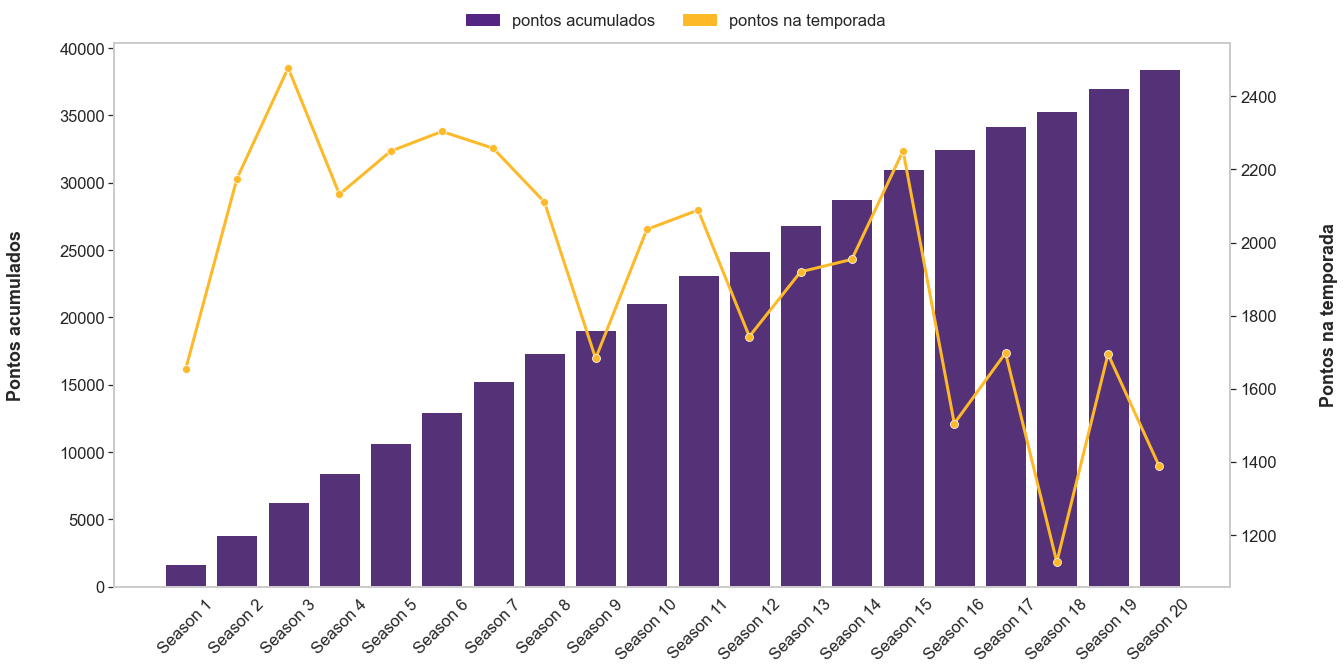

In [19]:
# Tema do seaborn para o gráfico
sns.set_theme(context='notebook', style='whitegrid', font='sans-serif', font_scale=1.5,
            rc={'lines.linewidth': 3,
                'axes.grid': False,
                'axes.linewidth': 2,
                'lines.markersize': 8
                }
            )

# Criação da janela de gráfico
fig, bar = plt.subplots(figsize=(20, 10))

# Gráfico de barras
sns.barplot(
    x='SEASON_N',
    y='PTS_SUM',
    data=lebron,
    color='#552583',
    ax=bar
)
bar_patch = mpatches.Patch(color='#552583', label='pontos acumulados')
bar.legend(handles=[bar_patch], loc='upper left')
bar.tick_params(axis='x', labelrotation = 45)
bar.set_xlabel('')
bar.set_ylabel('Pontos acumulados', fontweight='bold')
bar.yaxis.set_label_coords(-.08, .5)

# Gráfico de linhas
line = bar.twinx()
sns.lineplot(
    x='SEASON_N',
    y='PTS',
    data=lebron,
    color='#FDB927',
    marker='o',
    ax=line
)
line.grid(False)
line_patch = mpatches.Patch(color='#FDB927', label='pontos na temporada')
line.legend(handles=[line_patch], loc='upper right')
line.set_ylabel('Pontos na temporada', fontweight='bold')
line.yaxis.set_label_coords(1.08, .5)

# Movendo as duas legendas para a parte superior
sns.move_legend(
    bar, "lower center",
    bbox_to_anchor=(.4, 1), ncol=1, title=None, frameon=False
)
sns.move_legend(
    line, "lower center",
    bbox_to_anchor=(.6, 1), ncol=1, title=None, frameon=False
)

question_1 = plt.gcf() # salvar o gráfico para utilizar posteriormente
plt.show()

A segunda pergunta é:
* Em relação aos 5 maiores pontuadores, como LeBron se compara no volume total de pontos acumulados em cada temporada?

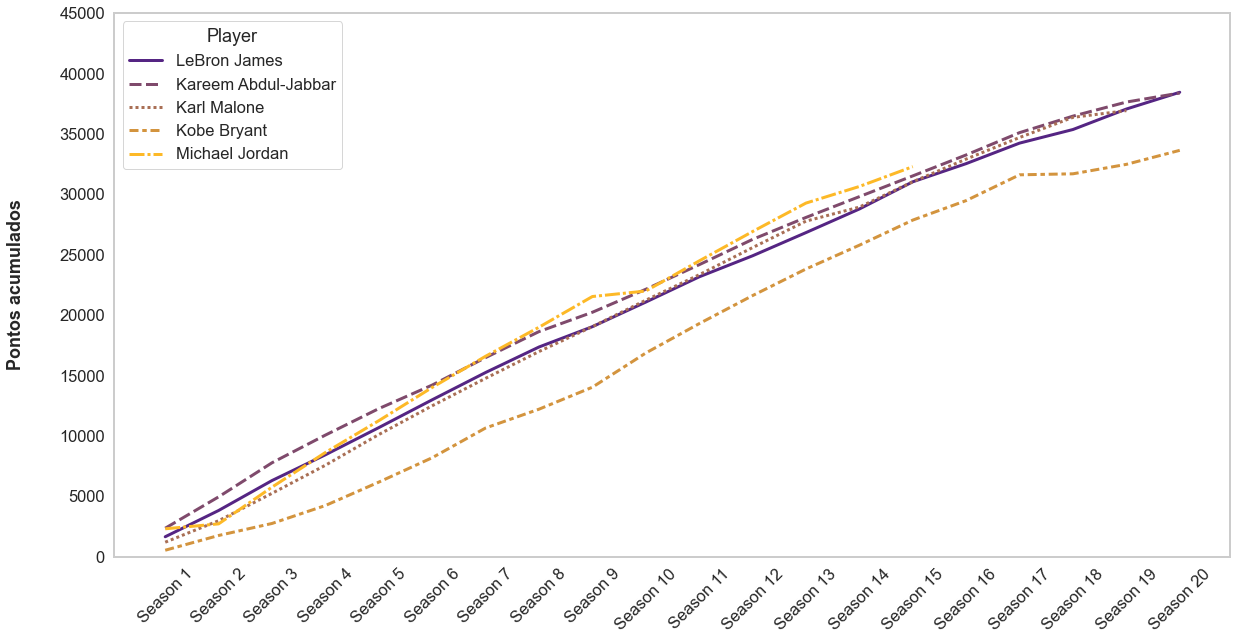

In [20]:
sns.set_theme(context='notebook', style='whitegrid', font='sans-serif', font_scale=1.5,
            rc={'lines.linewidth': 3,
                'axes.grid': False,
                'axes.linewidth': 2,
                'lines.markersize': 8
                }
            )
colors = sns.color_palette('blend:#552583,#FDB927', 5)

fig, graph = plt.subplots(figsize=(20, 10))

sns.lineplot(
    x='SEASON_N',
    y='PTS_SUM',
    data=all_top5,
    hue='FULL_NAME',
    style='FULL_NAME',
    color='#FDB927',
    palette=colors,
    ax=graph
    )
graph.set_ylabel('Pontos acumulados', fontweight='bold')
graph.set_xlabel('')
graph.tick_params(axis='x', labelrotation=45)
graph.yaxis.set_label_coords(-.08, .5)
graph.set_ylim(0, 45000)

# Mudando o nome da legenda
leg = graph.get_legend()
new_leg = 'Player'
leg.set_title(new_leg)

question_2 = plt.gcf() # salvar o gráfico para utilizar posteriormente
plt.show()

---

## Conclusão

O intuito desse projeto foi responder duas perguntas de forma visual:
* Quantos pontos LeBron marcou em cada temporada e qual o valor acumulado temporada após temporada?
* Em relação aos 5 maiores pontuadores, como LeBron se compara no volume total de pontos acumulados em cada temporada?

Para a primeira pergunta, temos o seguinte gráfico:

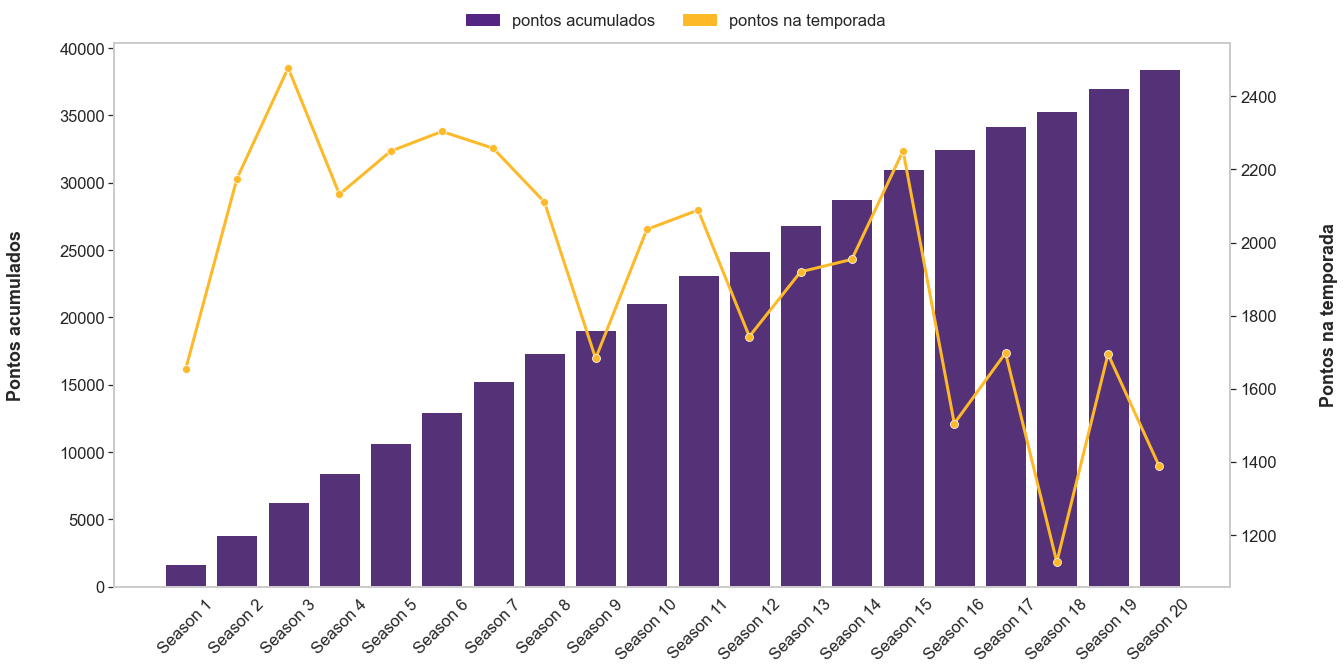

In [21]:
display(question_1)

Podemos perceber que ao longo das temporadas, o volume de pontuação de __LeBron James__ foi diminuindo, muito por conta do avanço na sua idade. Os maiores picos foram no início da sua carreira, mas ainda assim __LeBron__ conseguiu manter um alto volume até sua 15ª temporada.

Agora a visualização para a segunda pergunta:

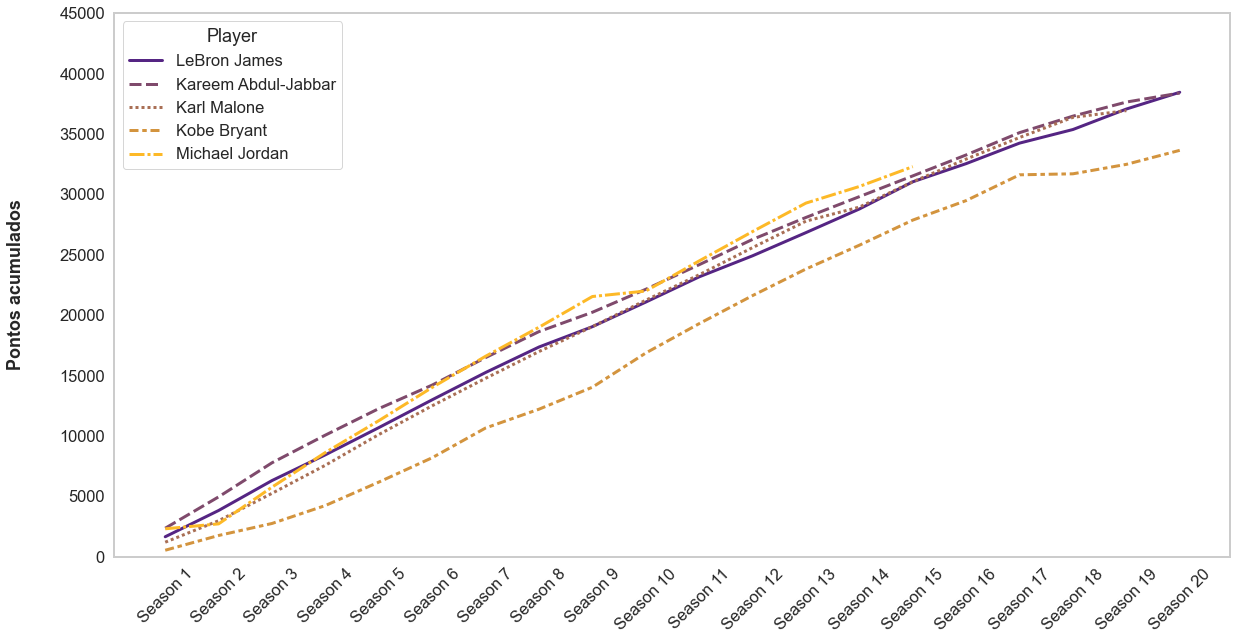

In [22]:
display(question_2)

É interessante visualizar que __Michael Jordan__ teve um volume de pontos por temporada praticamente maior que todos os jogadores que estão na sua frente no ranking. Porém, como __MJ__ jogou menos temporadas (15 no total), o seu acumulado final acaba sendo inferior aos outros.

Outro ponto é que __LeBron James__ foi alcançando __Kareem Abdul-Jabbar__ mais nas últimas temporadas, que foi onde __Kareem__ teve uma diminuição no seu volume de pontos por temporada também.

![](bot-reps-nba.jpg)